# Data analysis of gasoline mileage in my rx8

First we load packages.

In [12]:
import MySQLdb as mdb
import sys
import pandas as pd
import pandas.io.sql
import numpy as np
from numpy import log
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import linear_model
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')

Next we connect to the MySQL database and load the entire table as a pandas dataframe.

In [13]:
con = mdb.connect(host='localhost', db='mpg_db', read_default_file='~/.my.cnf')
gas_data = pd.read_sql("SELECT * FROM mpg_table", con)
con.close()

In [14]:
print(type(gas_data)) #shows type as pandas dataframe

<class 'pandas.core.frame.DataFrame'>


Here's an example of using the dataframe to get the mean of the mpg column.

In [15]:
print(np.mean(gas_data['mpg']))

14.4259819266


Now we plot the mileage over time.

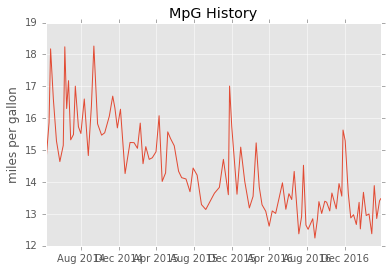

In [16]:
dateplot = plt.plot_date(matplotlib.dates.date2num(gas_data['thedate']), gas_data['mpg'], '-') #time-mpg
plt.title('MpG History')
plt.ylabel('miles per gallon')
plt.show(dateplot)

The following is a plot of mileage given the number of miles driven per day. The MpD is used as an indicator of highway driving, and we expect highway driving to produce better MpG.

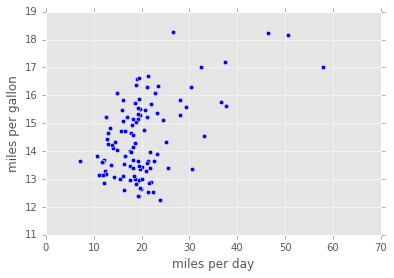

In [17]:
mpdmpgplot = plt.scatter(gas_data['mpd'], gas_data['mpg']) #mpd-mpg
plt.ylabel('miles per gallon')
plt.xlabel('miles per day')
plt.show(mpdmpgplot)

Here we run a linear regression using the statsmodel library.

In [18]:
regression2 = smf.ols(formula = 'mpg ~ mpd', data = gas_data).fit()
print(regression2.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.270
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     39.66
Date:                Mon, 08 May 2017   Prob (F-statistic):           6.84e-09
Time:                        20:15:52   Log-Likelihood:                -173.21
No. Observations:                 109   AIC:                             350.4
Df Residuals:                     107   BIC:                             355.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.5336      0.322     38.970      0.0

Here's an alternative method ot get some regression data using the scikit library.

In [21]:
mpg_data2 = gas_data[['mpg']]
mpd_data2 = gas_data[['mpd']]
sk_regr = linear_model.LinearRegression()
sk_regr.fit(mpd_data2, mpg_data2)
print(sk_regr.coef_)
print(sk_regr.intercept_)
print(sk_regr.score(mpd_data2, mpg_data2))

[[ 0.09348734]]
[ 12.53357168]
0.27040179158


We can see the data matches up with both methods. This linear model isn't a great fit, as indicated by the R-squared value.

We can also try a log model, however the fit appears to be even worse.

In [22]:
gas_data['log_mpd'] = log(gas_data['mpd'])
gas_data['log_mpg'] = log(gas_data['mpg'])
log_lm = smf.ols(formula = 'log_mpg ~ log_mpd', data = gas_data).fit()
print(log_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                log_mpg   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.203
Method:                 Least Squares   F-statistic:                     28.57
Date:                Mon, 08 May 2017   Prob (F-statistic):           5.14e-07
Time:                        20:23:37   Log-Likelihood:                 115.92
No. Observations:                 109   AIC:                            -227.8
Df Residuals:                     107   BIC:                            -222.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2750      0.073     31.031      0.0